In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
# filenames = glob.glob("../data/CICIDS2017/MachineLearningCVE/*")
# filenames
# for i,fn in enumerate(filenames):
#     print("load file",fn)
#     if i==0:
#         df = pd.read_csv(fn)
#     else:
#         df_temp = pd.read_csv(fn)
#         df = pd.concat([df,df_temp])
#         del df_temp

['../data/CICIDS2017/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 '../data/CICIDS2017/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 '../data/CICIDS2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 '../data/CICIDS2017/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv',
 '../data/CICIDS2017/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv',
 '../data/CICIDS2017/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv',
 '../data/CICIDS2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 '../data/CICIDS2017/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv']

In [16]:
df = pd.read_csv("../data/CICIDS2017/CICIDS2017_ZeekFlowmeter.csv",header=1)

# Explore dataset

In [17]:
df.head()

,uid,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size
0,CruXvq1g8jZe5jUCk9,0.000269,2,2,2,2,7436.709220,7436.709220,14873.418440,1.0,...,0.0000,0.00,0.00,0.00,0.00,0.0,0,0,0,0
1,C0yVWleLJcmRrl6If,60.311469,10,8,4,5,0.165806,0.132645,0.298451,0.8,...,172166.1672,59968858.96,59968858.96,59968858.96,59968858.96,0.0,8192,8192,253,513
2,CThZuw1PszW7Z0Gro7,0.023978,2,2,2,2,83.409810,83.409810,166.819620,1.0,...,0.0000,0.00,0.00,0.00,0.00,0.0,0,0,0,0
3,CeOrnA3fGAj6bUZlP4,0.023527,1,1,1,1,42.504525,42.504525,85.009050,1.0,...,0.0000,0.00,0.00,0.00,0.00,0.0,0,0,0,0
4,CWo8W41dIX5sCWeTz9,0.000171,2,2,2,2,11683.298050,11683.298050,23366.596100,1.0,...,0.0000,0.00,0.00,0.00,0.00,0.0,0,0,0,0


In [18]:
print("the number of duplicates: ",len(df)-len(df.drop_duplicates(ignore_index=True)))
print("the ratio of duplicates: ",(len(df)-len(df.drop_duplicates(ignore_index=True)))/len(df))

the number of duplicates:  0
the ratio of duplicates:  0.0


In [19]:
print("Column counts with negative values")
numeric_cols = _numeric_col(df)
aa = (df[numeric_cols]<0).sum(axis=0)
print(aa[aa>0])

Column counts with negative values
Series([], dtype: int64)


# Preprocess DF

- drop data with missing values
- drop data with negative values
- drop data with only a single value
- remove duplicates

In [27]:
def preprocess_df(df):
    print("original df: ", df.shape)
    print("+"*50)

    print("drop NA")
    df_proc = df.dropna(axis=0)
    print("drop rows: ", df.shape[0]-df_proc.shape[0])
    print("data size after dropping", df_proc.shape)
    print("+"*50)
    
    tmp = df_proc.shape
    print("remove data having negative values")
    numeric_cols = _numeric_col(df_proc)
    df_proc = df_proc[(df_proc[numeric_cols]>=0).all(axis=1)]
    print("drop rows: ", tmp[0]-df_proc.shape[0])
    print("data after droppnig negative: ", df_proc.shape)
    print("+"*50)
    
    tmp = df_proc.shape
    print("drop deficient columns")
    dfc_col = find_deficient_col(df_proc)
    print("//".join(dfc_col))
    df_proc.drop(columns = dfc_col, inplace = True)
    print("drop columns: ", tmp[1]-df_proc.shape[1])
    print("data after droppnig columns: ", df_proc.shape)
    print("+"*50)
    
    tmp = df_proc.shape
    print("remove duplicates")
    df_proc.drop_duplicates(inplace=True, ignore_index=True)
    print("drop rows: ", tmp[0]-df_proc.shape[0])
    
    print("final df shape:", df_proc.shape)
    print("final differences: ", df.shape[0]-df_proc.shape[0],
         df.shape[1]-df_proc.shape[1])
    
    return df_proc

def _numeric_col(df):
    cols = []
    for cn in df.columns:
        col = df[cn]
        if col.dtypes in ['int64','float64']:
            cols.append(cn)
    return cols

def find_deficient_col(df):
    dfc_col = []
    for col in df.columns:
        if len(df[col].unique()) ==1:
            dfc_col.append(col)
    return dfc_col

In [28]:
df_proc = preprocess_df(df)

original df:  (363758, 81)
++++++++++++++++++++++++++++++++++++++++++++++++++
drop NA
drop rows:  0
data size after dropping (363758, 81)
++++++++++++++++++++++++++++++++++++++++++++++++++
remove data having negative values
drop rows:  0
data after droppnig negative:  (363758, 81)
++++++++++++++++++++++++++++++++++++++++++++++++++
drop deficient columns
bwd_URG_flag_count
drop columns:  1
data after droppnig columns:  (363758, 80)
++++++++++++++++++++++++++++++++++++++++++++++++++
remove duplicates
drop rows:  0
final df shape: (363758, 80)
final differences:  0 1


## Standardize Data

- skewness test on variables

In [29]:
df_proc.head()

,uid,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size
0,CruXvq1g8jZe5jUCk9,0.000269,2,2,2,2,7436.709220,7436.709220,14873.418440,1.0,...,0.0000,0.00,0.00,0.00,0.00,0.0,0,0,0,0
1,C0yVWleLJcmRrl6If,60.311469,10,8,4,5,0.165806,0.132645,0.298451,0.8,...,172166.1672,59968858.96,59968858.96,59968858.96,59968858.96,0.0,8192,8192,253,513
2,CThZuw1PszW7Z0Gro7,0.023978,2,2,2,2,83.409810,83.409810,166.819620,1.0,...,0.0000,0.00,0.00,0.00,0.00,0.0,0,0,0,0
3,CeOrnA3fGAj6bUZlP4,0.023527,1,1,1,1,42.504525,42.504525,85.009050,1.0,...,0.0000,0.00,0.00,0.00,0.00,0.0,0,0,0,0
4,CWo8W41dIX5sCWeTz9,0.000171,2,2,2,2,11683.298050,11683.298050,23366.596100,1.0,...,0.0000,0.00,0.00,0.00,0.00,0.0,0,0,0,0


In [23]:
def histogram_dataframe(df):
    for colname in df.columns:
        col = df[colname]
    #     print(colname, col.dtypes)
        if col.dtypes in ['int64','float64']:
            print(min(col))
    #         print(len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
    #               max(col[np.isfinite(col)]), min(col[np.isfinite(col)]),len(col.unique()))
            plt.title(colname+" "+str(col.skew()))
            plt.hist(col[np.isfinite(col)])
            plt.show()

0.0


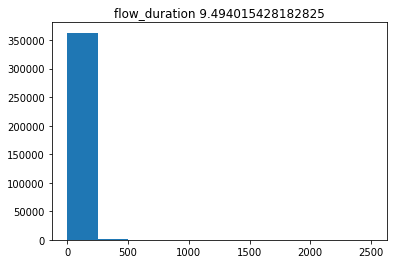

0


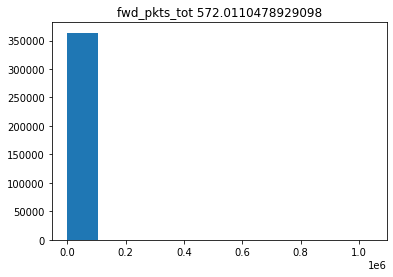

0


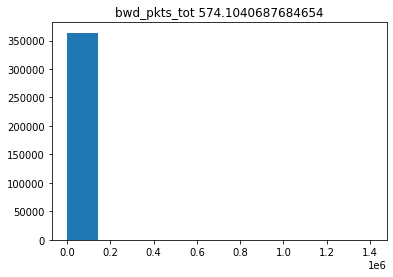

0


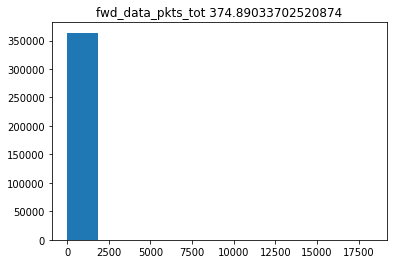

0


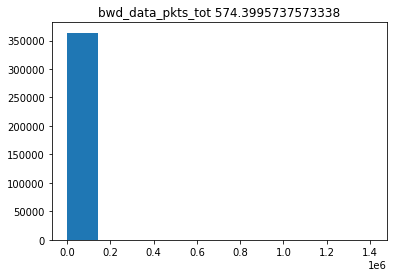

0.0


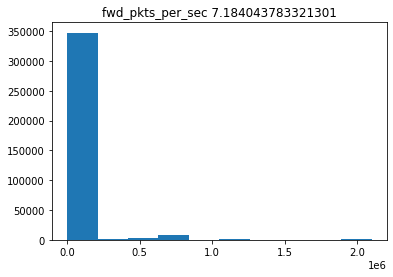

0.0


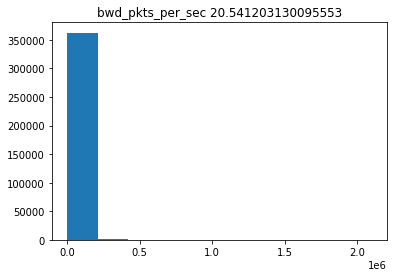

0.0


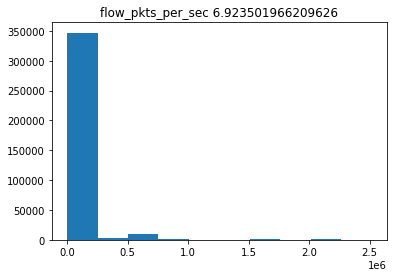

0.0


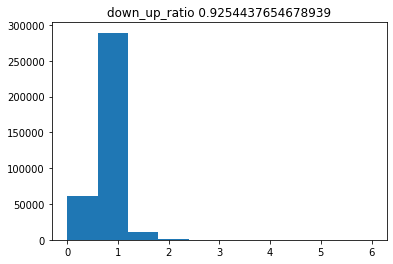

0


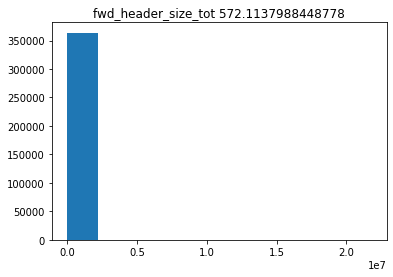

0


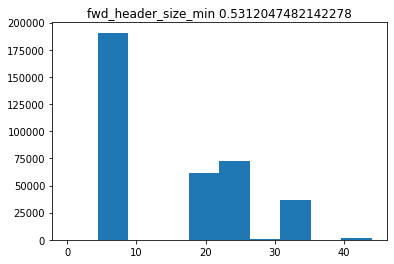

0


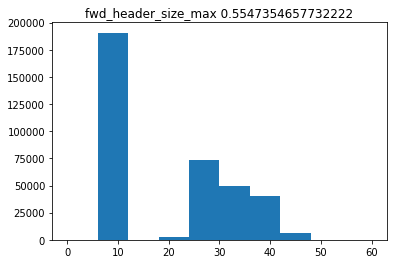

0


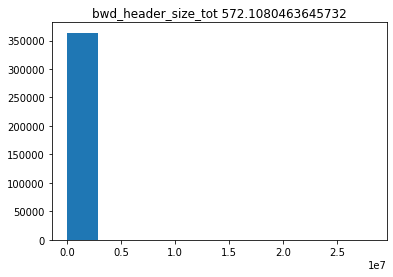

0


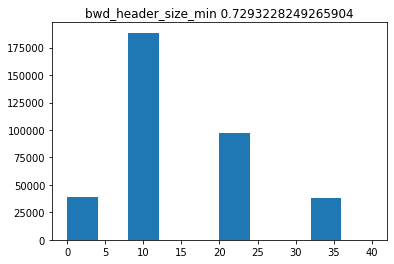

0


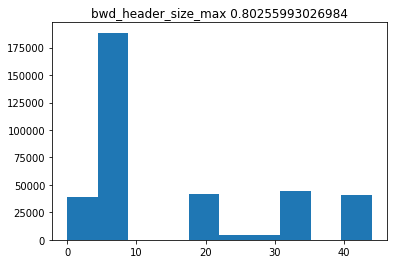

0


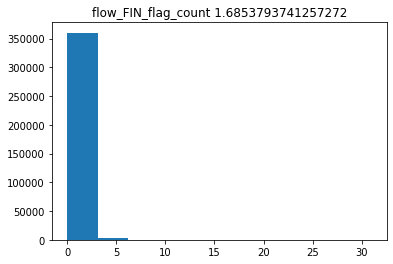

0


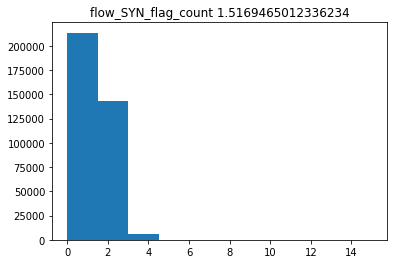

0


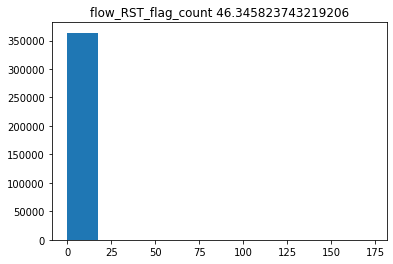

0


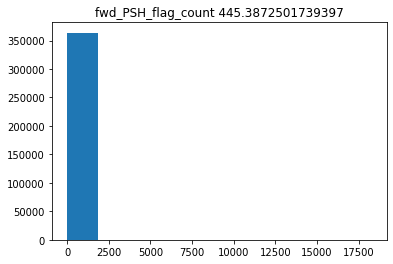

0


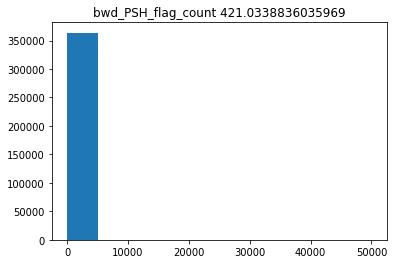

0


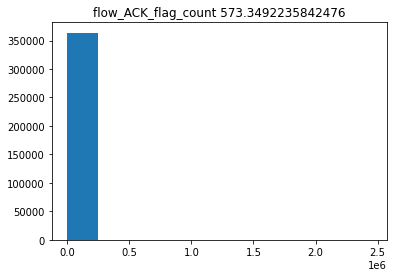

0


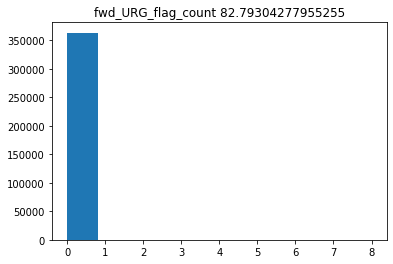

0


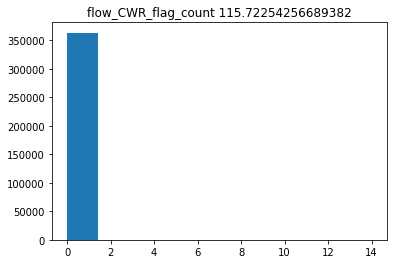

0


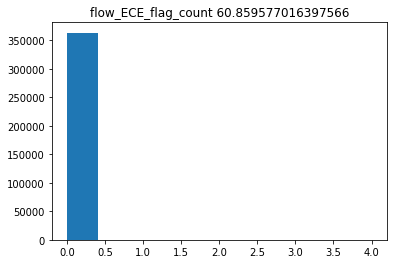

0


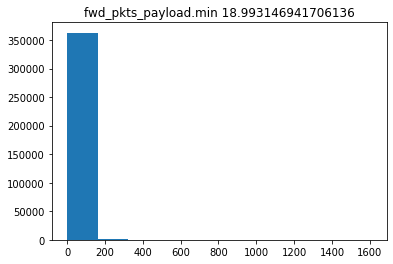

0


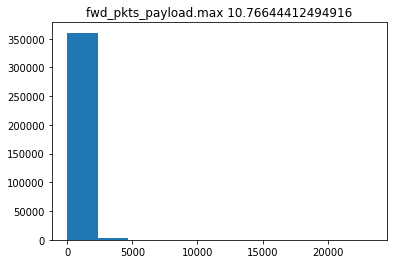

0


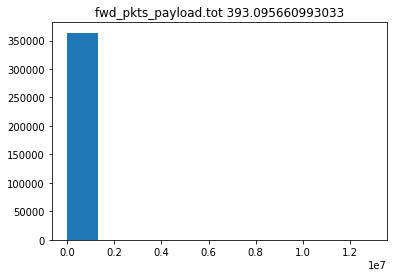

0.0


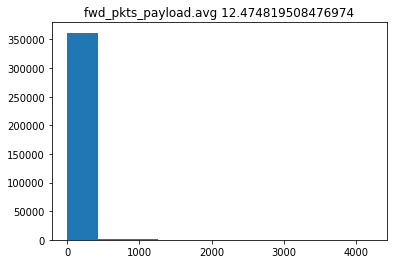

0.0


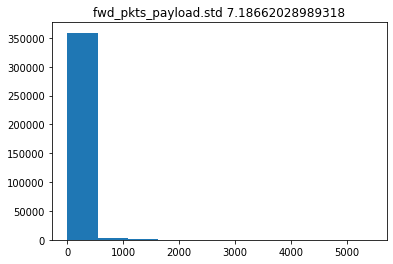

0


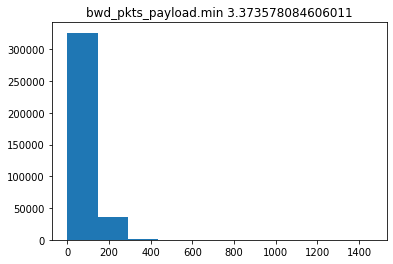

0


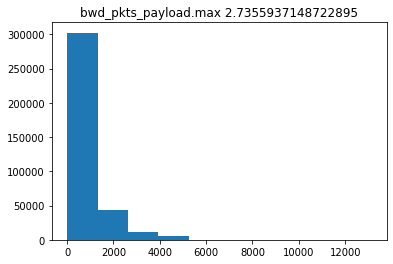

0


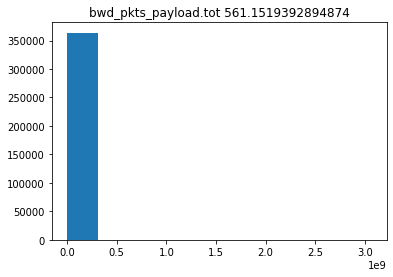

0.0


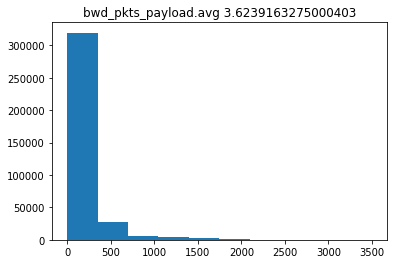

0.0


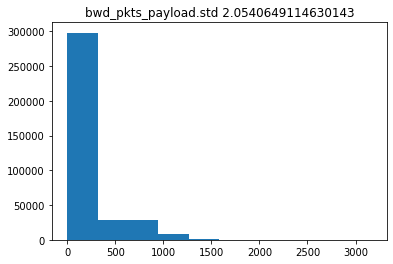

0


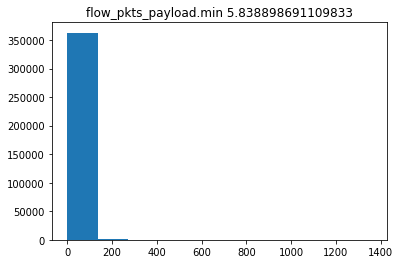

0


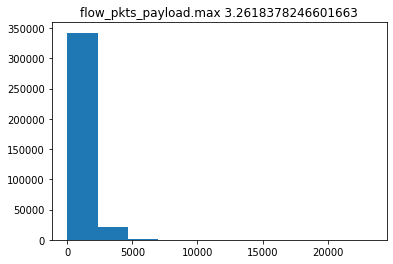

0


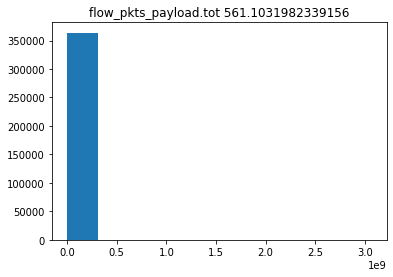

0.0


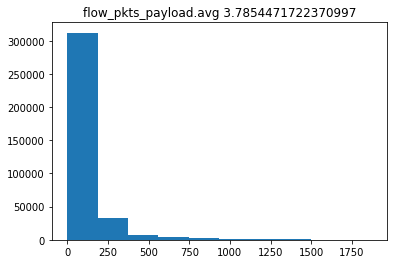

0.0


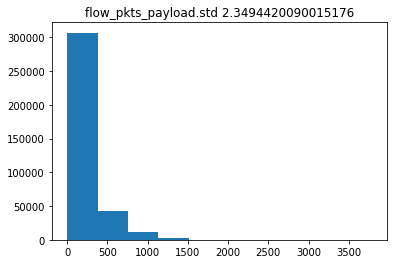

0.0


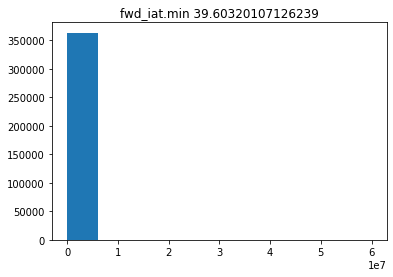

0.0


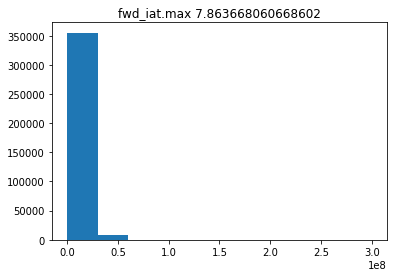

0.0


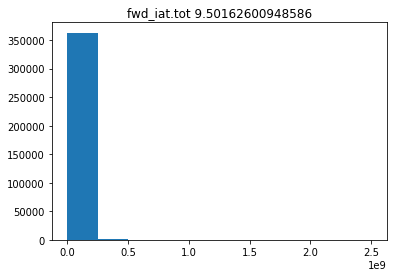

0.0


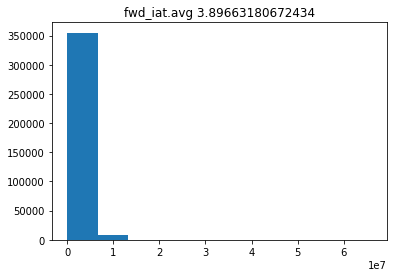

0.0


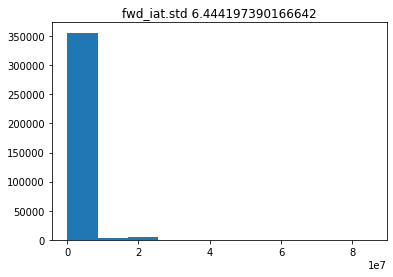

0.0


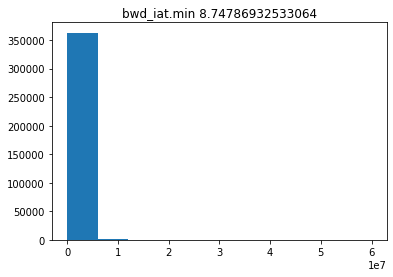

0.0


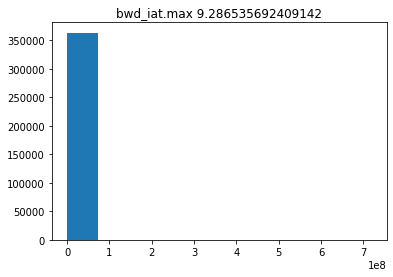

0.0


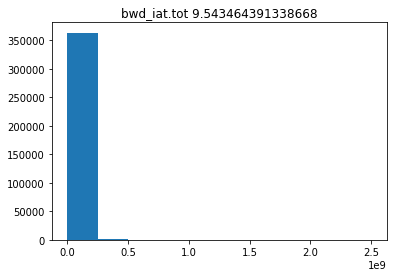

0.0


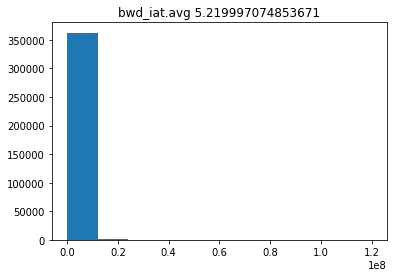

0.0


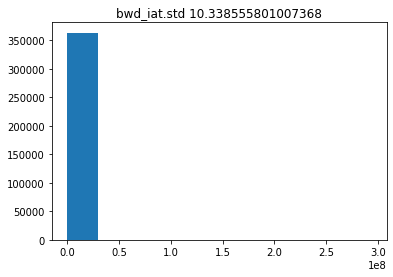

0.0


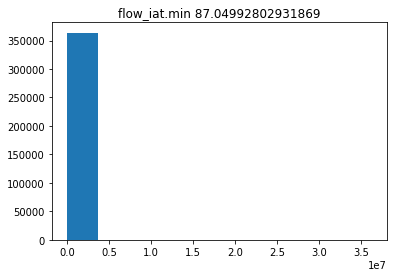

0.0


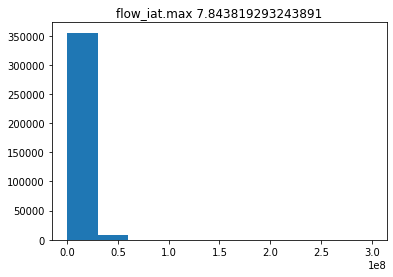

0.0


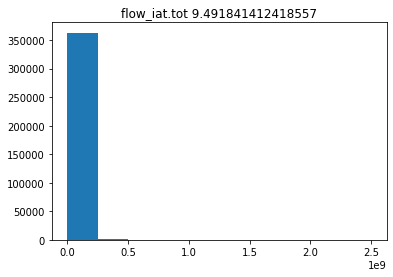

0.0


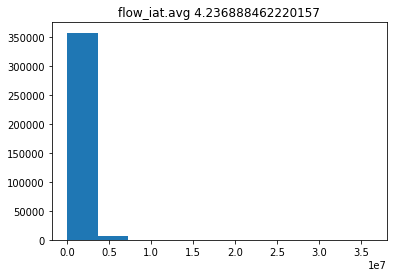

0.0


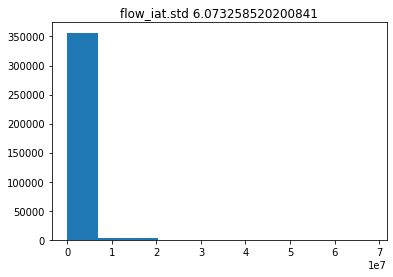

0.0


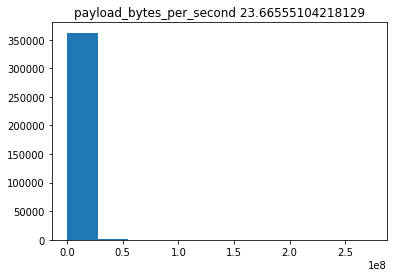

0.0


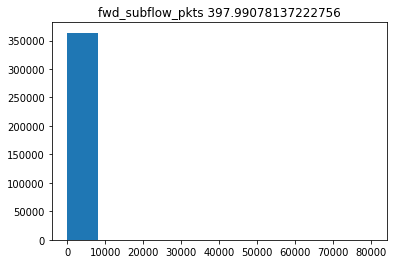

0.0


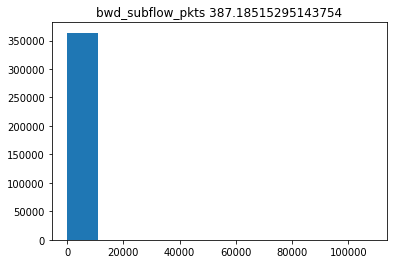

0.0


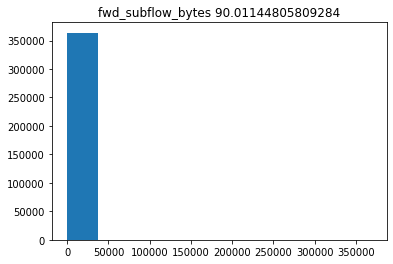

0.0


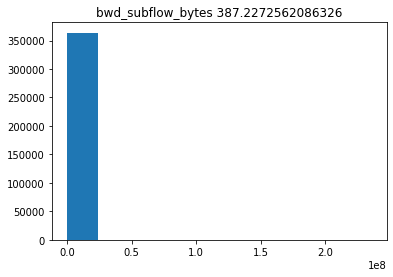

0.0


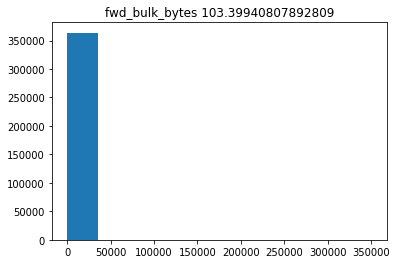

0.0


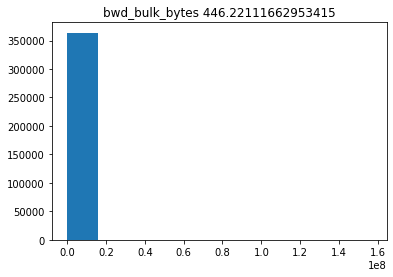

0.0


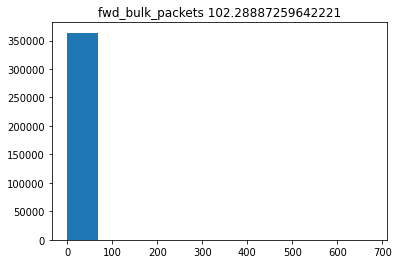

0.0


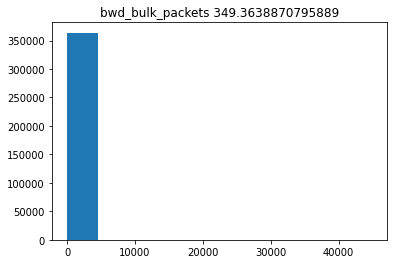

0.0


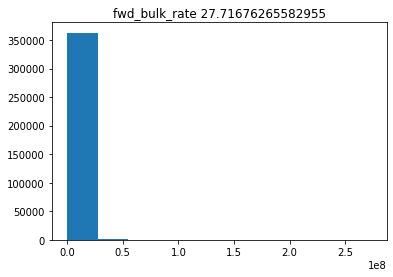

0.0


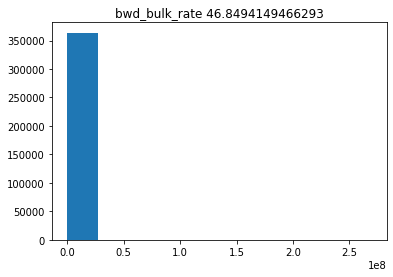

0.0


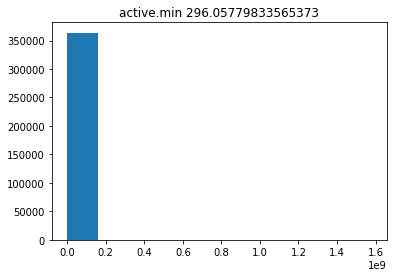

0.0


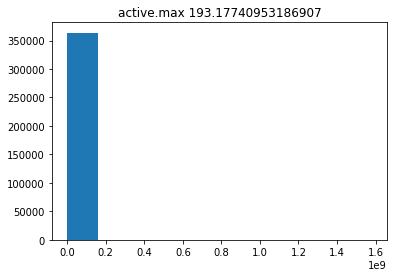

0.0


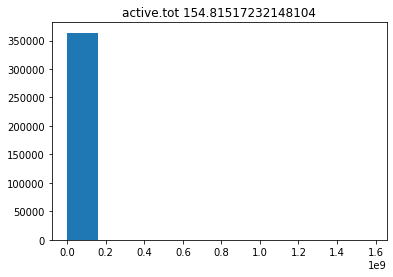

0.0


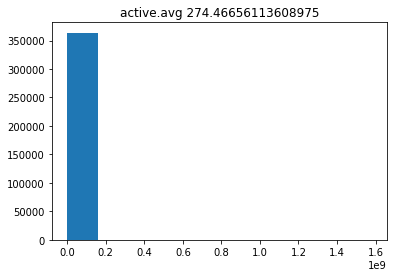

0.0


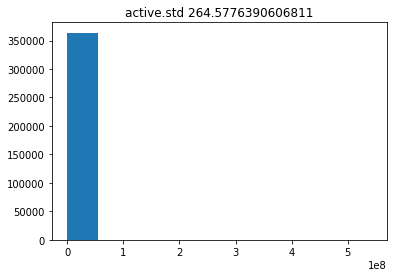

0.0


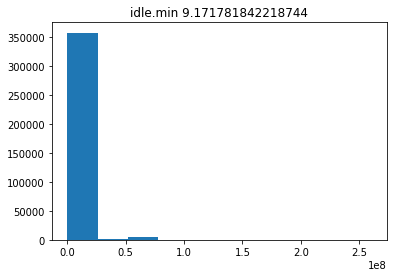

0.0


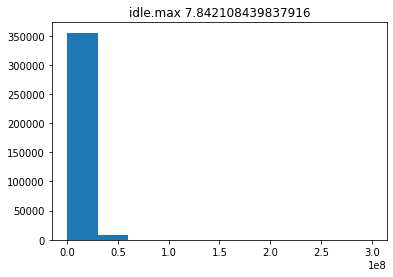

0.0


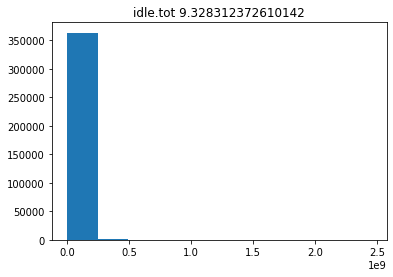

0.0


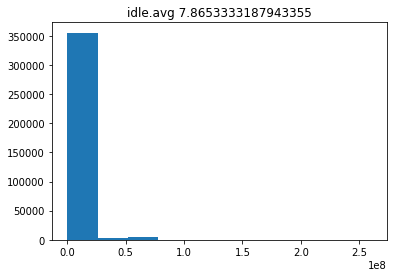

0.0


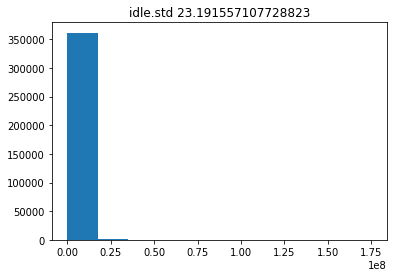

0


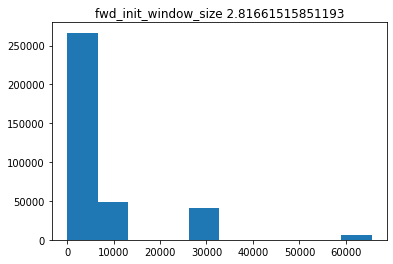

0


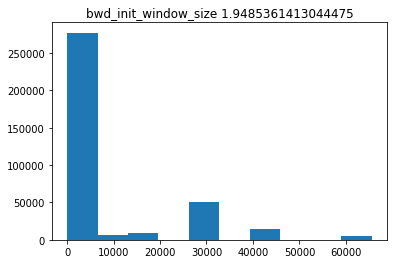

0


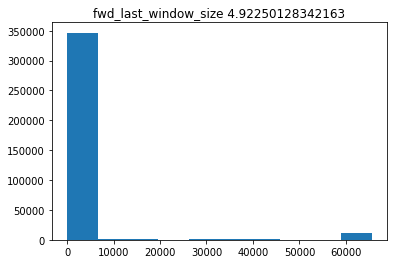

0


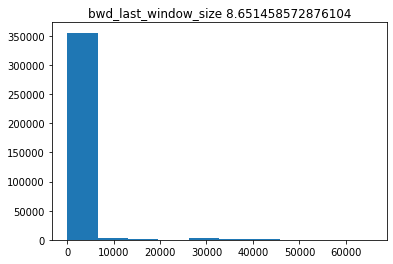

In [24]:
histogram_dataframe(df_proc)

In [85]:
for colname in df.columns:
    col = df[colname]
    print(colname,",", col.dtypes)
#     if col.dtypes in ['int64','float64']:

 Destination Port , int64
 Flow Duration , int64
 Total Fwd Packets , int64
 Total Backward Packets , int64
Total Length of Fwd Packets , int64
 Total Length of Bwd Packets , int64
 Fwd Packet Length Max , int64
 Fwd Packet Length Min , int64
 Fwd Packet Length Mean , float64
 Fwd Packet Length Std , float64
Bwd Packet Length Max , int64
 Bwd Packet Length Min , int64
 Bwd Packet Length Mean , float64
 Bwd Packet Length Std , float64
Flow Bytes/s , float64
 Flow Packets/s , float64
 Flow IAT Mean , float64
 Flow IAT Std , float64
 Flow IAT Max , int64
 Flow IAT Min , int64
Fwd IAT Total , int64
 Fwd IAT Mean , float64
 Fwd IAT Std , float64
 Fwd IAT Max , int64
 Fwd IAT Min , int64
Bwd IAT Total , int64
 Bwd IAT Mean , float64
 Bwd IAT Std , float64
 Bwd IAT Max , int64
 Bwd IAT Min , int64
Fwd PSH Flags , int64
 Bwd PSH Flags , int64
 Fwd URG Flags , int64
 Bwd URG Flags , int64
 Fwd Header Length , int64
 Bwd Header Length , int64
Fwd Packets/s , float64
 Bwd Packets/s , float64
 Min

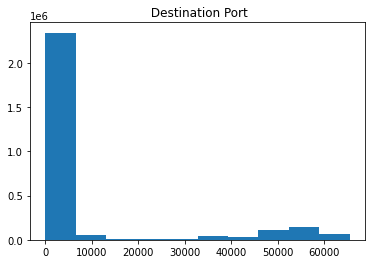

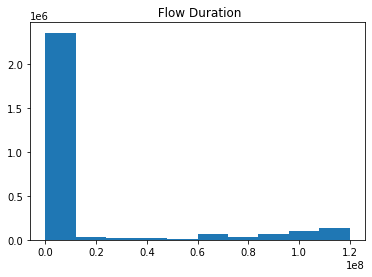

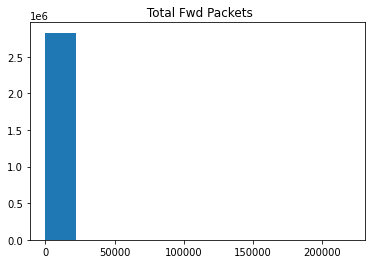

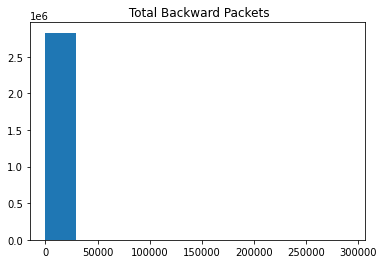

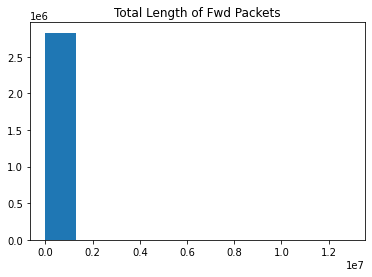

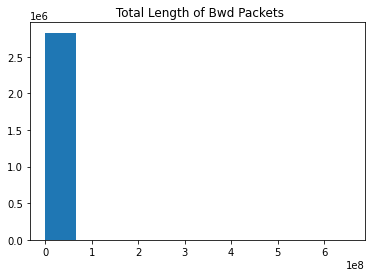

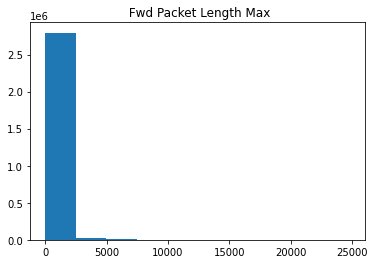

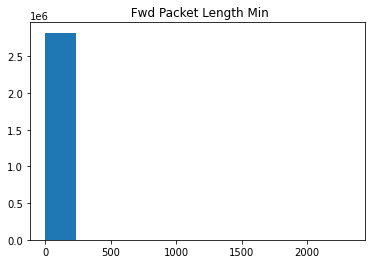

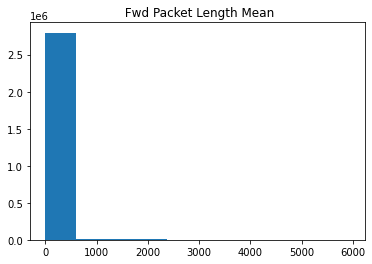

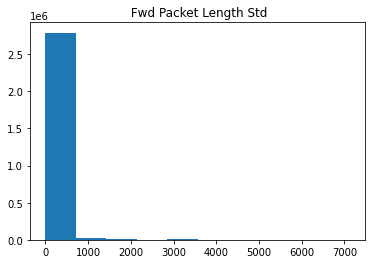

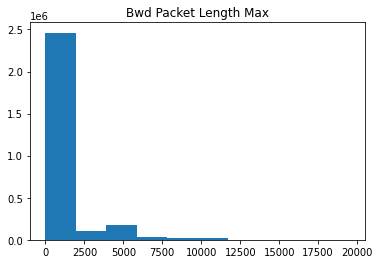

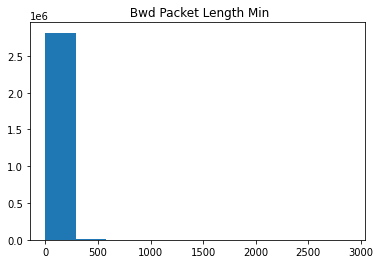

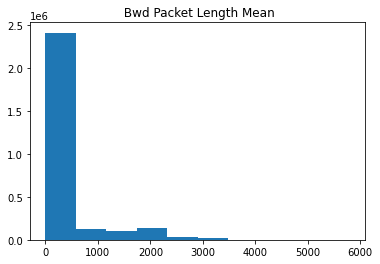

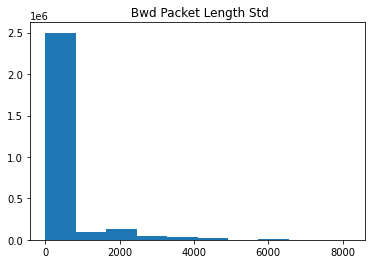

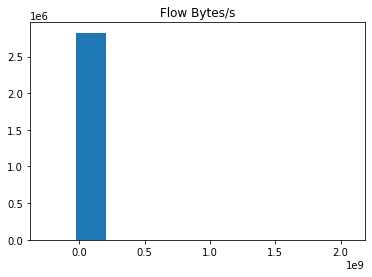

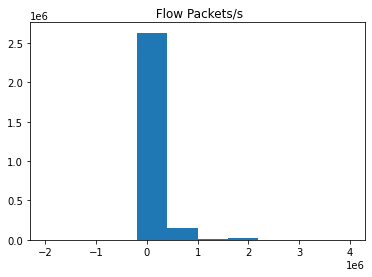

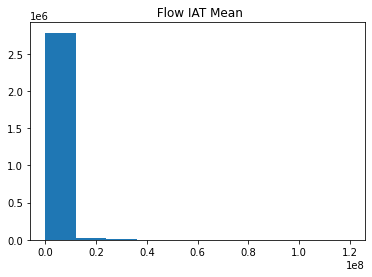

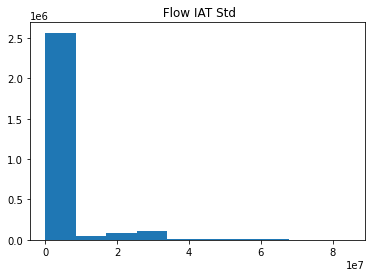

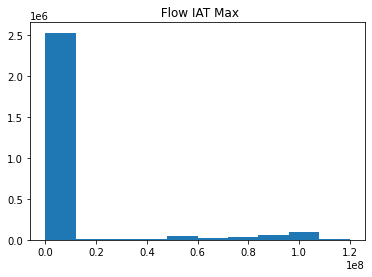

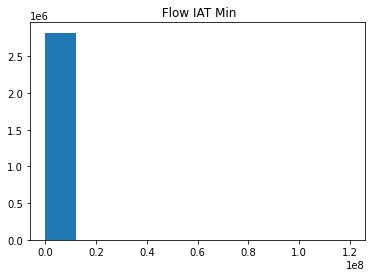

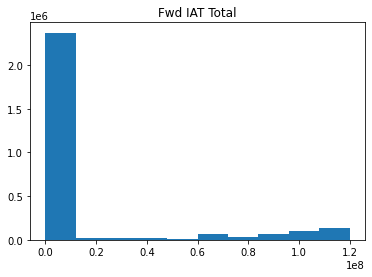

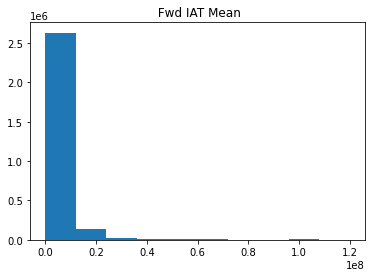

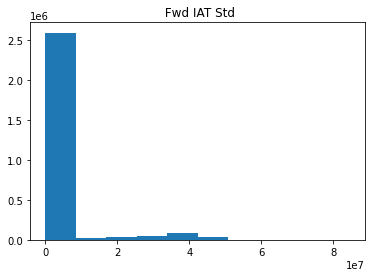

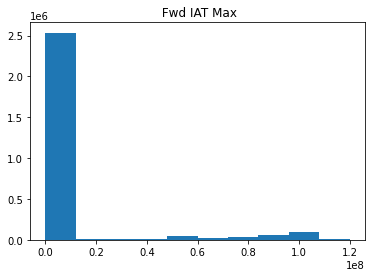

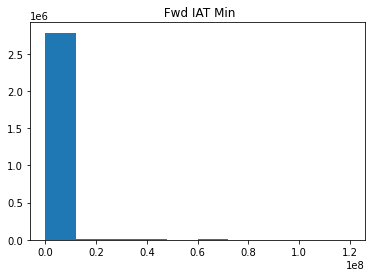

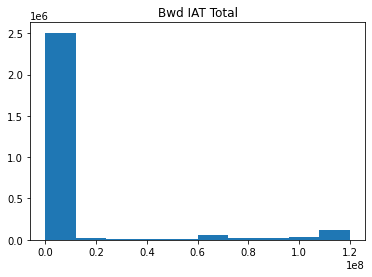

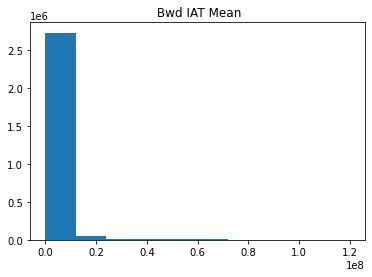

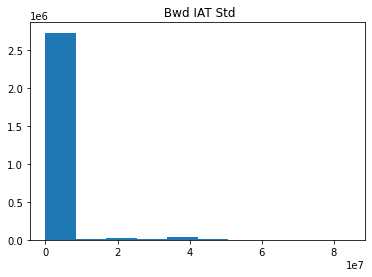

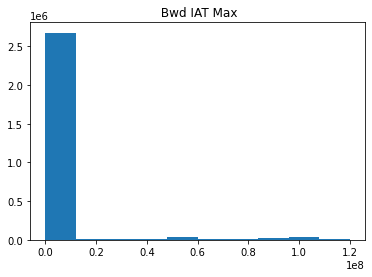

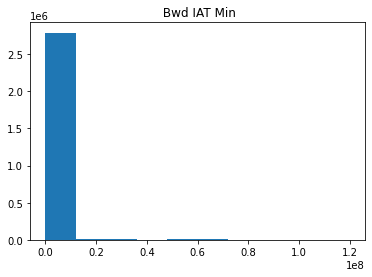

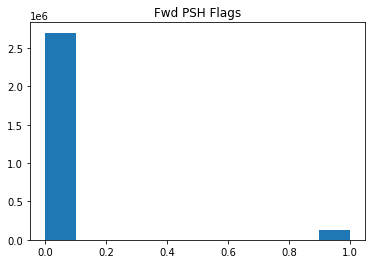

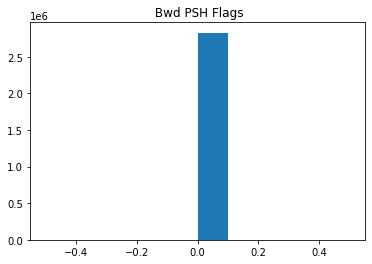

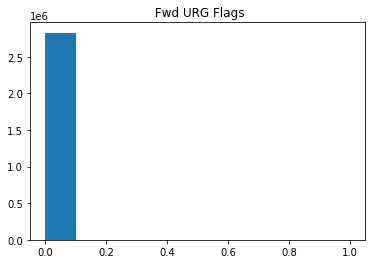

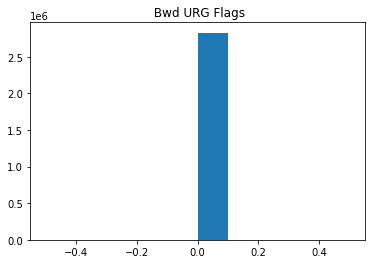

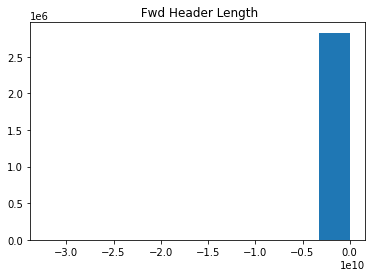

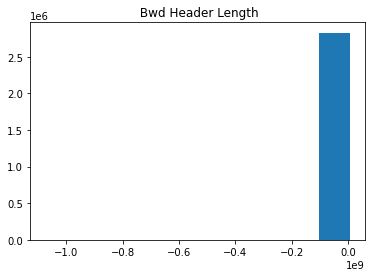

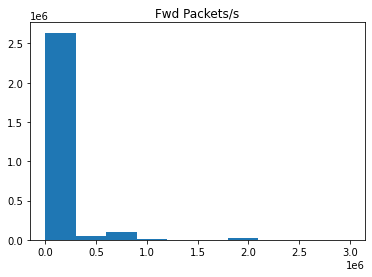

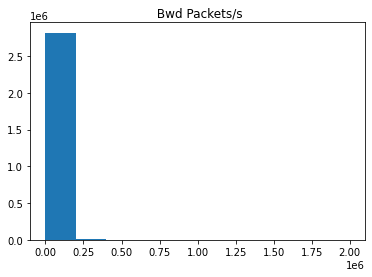

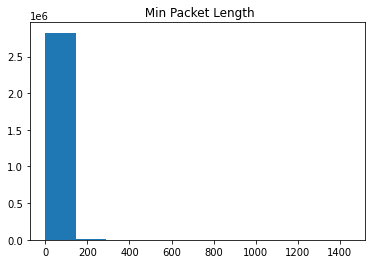

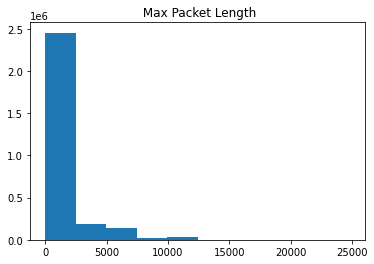

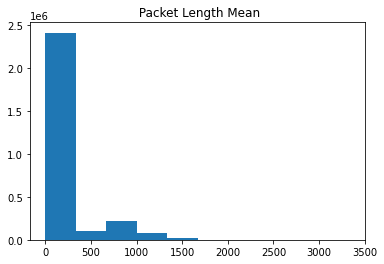

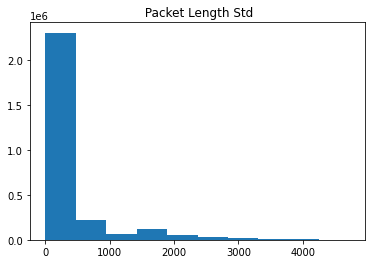

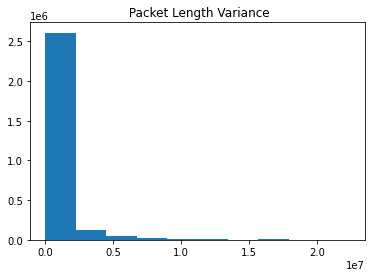

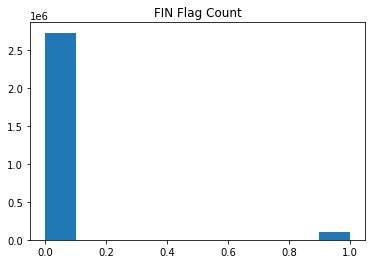

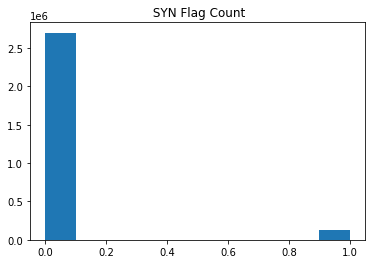

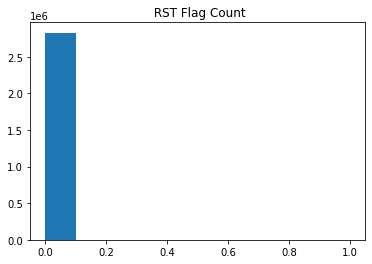

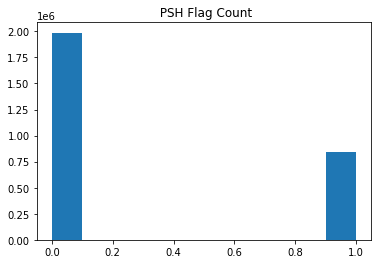

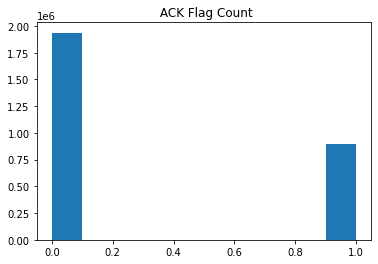

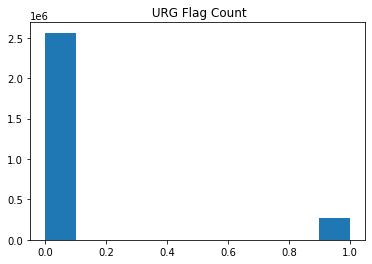

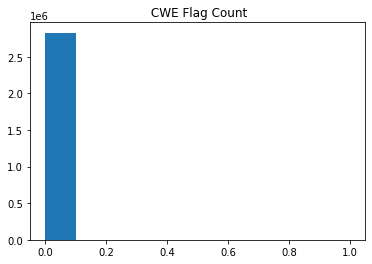

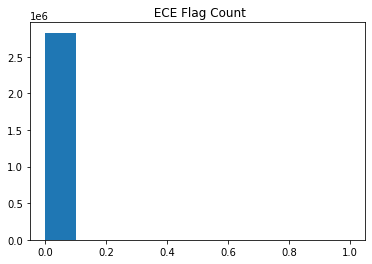

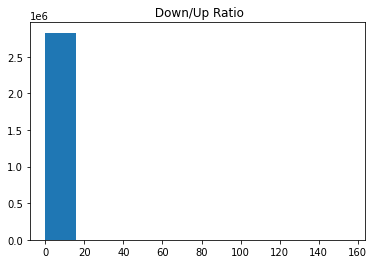

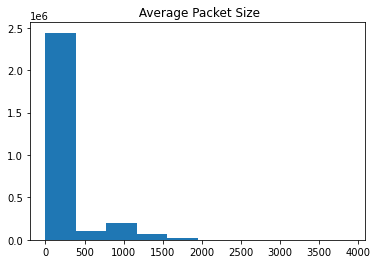

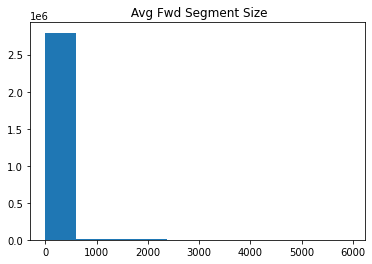

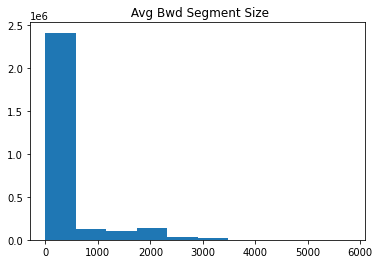

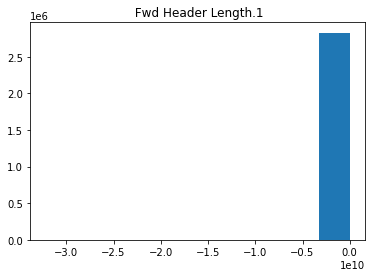

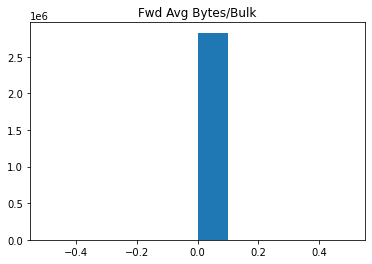

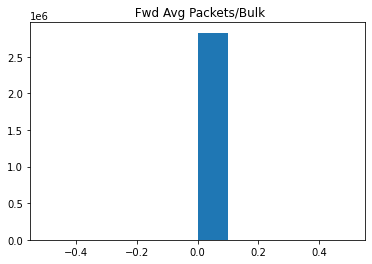

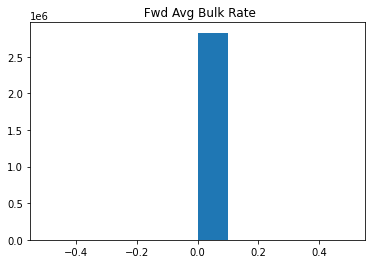

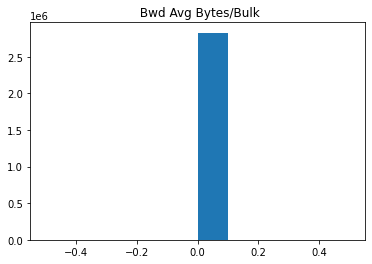

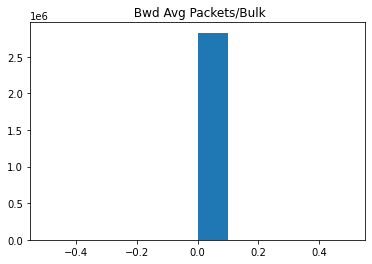

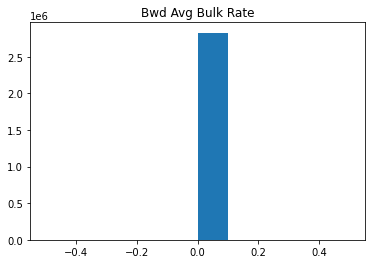

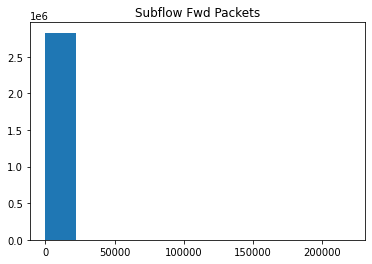

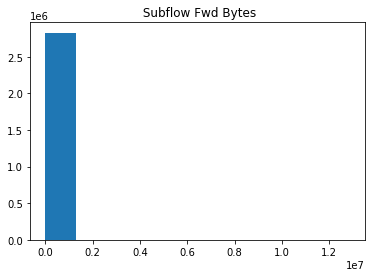

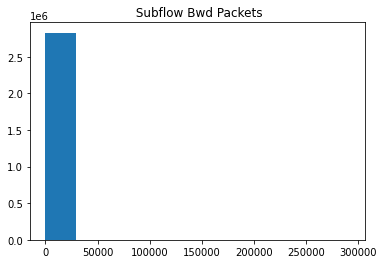

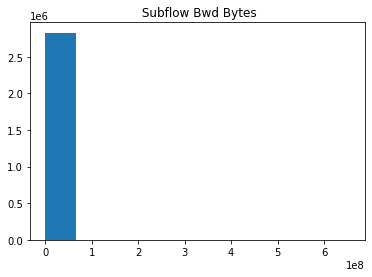

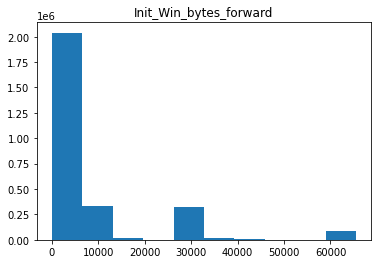

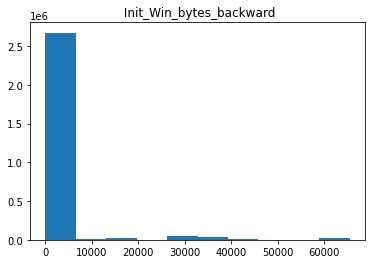

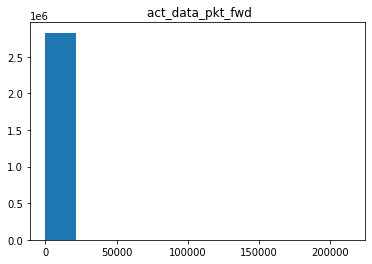

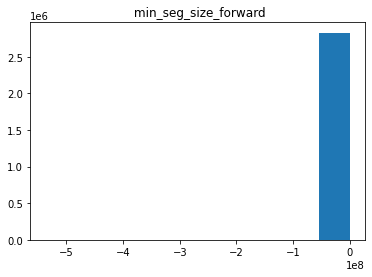

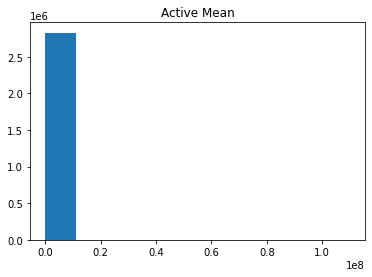

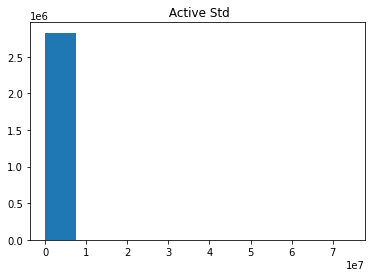

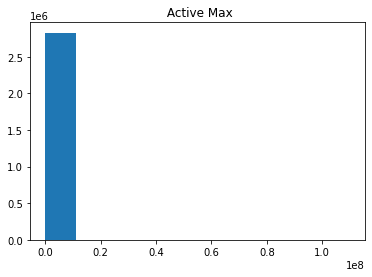

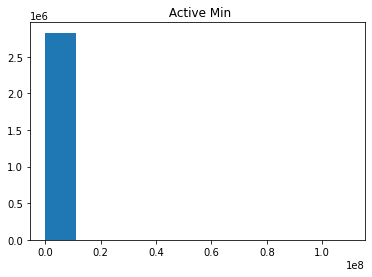

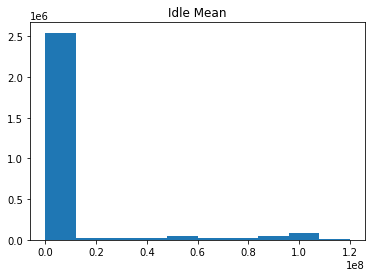

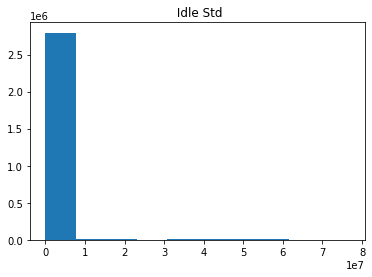

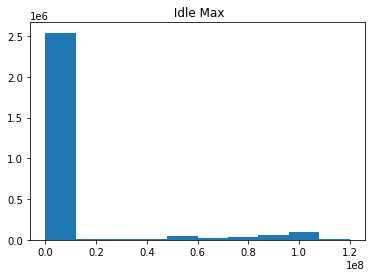

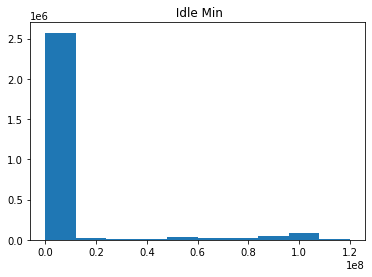

In [6]:
def histogram_dataframe(df):
    for colname in df.columns:
        col = df[colname]
    #     print(colname, col.dtypes)
        if col.dtypes in ['int64','float64']:
    #         print(len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
    #               max(col[np.isfinite(col)]), min(col[np.isfinite(col)]),len(col.unique()))
            plt.title(colname)
            plt.hist(col[np.isfinite(col)])
            plt.show()

In [7]:
for colname in df.columns:
    col = df[colname]
#     print(colname, col.dtypes)
    if col.dtypes in ['int64','float64']:
        print(col.dtypes,len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
              max(col[np.isfinite(col)]), min(col[np.isfinite(col)]),len(col.unique()))

int64 0 0 0 65535 0 53805
int64 0 0 0 119999998 -13 1050899
int64 0 0 0 219759 1 1432
int64 0 0 0 291922 0 1747
int64 0 0 0 12900000 0 17928
int64 0 0 0 655453030 0 64698
int64 0 0 0 24820 0 5279
int64 0 0 0 2325 0 384
float64 0 0 0 5940.857143 0.0 99716
float64 0 0 0 7125.5968458437 0.0 253909
int64 0 0 0 19530 0 4838
int64 0 0 0 2896 0 583
float64 0 0 0 5800.5 0.0 147614
float64 0 0 0 8194.660487 0.0 248869
float64 2867 1358 1358 2071000000.0 -261000000.0 1593909
float64 2867 0 0 4000000.0 -2000000.0 1240164
float64 0 0 0 120000000.0 -13.0 1166311
float64 0 0 0 84800261.5664079 0.0 1056642
int64 0 0 0 120000000 -13 580289
int64 0 0 0 120000000 -14 136316
int64 0 0 0 120000000 0 493098
float64 0 0 0 120000000.0 0.0 737737
float64 0 0 0 84602929.2769822 0.0 700313
int64 0 0 0 120000000 0 437316
int64 0 0 0 120000000 -12 110631
int64 0 0 0 120000000 0 414928
float64 0 0 0 120000000.0 0.0 670824
float64 0 0 0 84418013.7826341 0.0 709042
int64 0 0 0 120000000 0 368285
int64 0 0 0 12000000

In [86]:
labels = df[' Label'].unique()
lb_count = []
for lb in labels:
    lb_count.append(sum(df[' Label']==lb))
    print(lb,",",sum(df[' Label']==lb))

BENIGN , 2273097
Web Attack � Brute Force , 1507
Web Attack � XSS , 652
Web Attack � Sql Injection , 21
Infiltration , 36
DDoS , 128027
Bot , 1966
DoS slowloris , 5796
DoS Slowhttptest , 5499
DoS Hulk , 231073
DoS GoldenEye , 10293
Heartbleed , 11
PortScan , 158930
FTP-Patator , 7938
SSH-Patator , 5897


In [87]:
labels = df_nodup[' Label'].unique()
lb_count = []
for lb in labels:
    lb_count.append(sum(df_nodup[' Label']==lb))
    print(lb,",",sum(df_nodup[' Label']==lb))

BENIGN , 2096484
Web Attack � Brute Force , 1470
Web Attack � XSS , 652
Web Attack � Sql Injection , 21
Infiltration , 36
DDoS , 128016
Bot , 1953
DoS slowloris , 5385
DoS Slowhttptest , 5228
DoS Hulk , 172849
DoS GoldenEye , 10286
Heartbleed , 11
PortScan , 90819
FTP-Patator , 5933
SSH-Patator , 3219


In [ ]:
cn = ' Destination Port'
attrs = df[cn].unique()
attr_count = []
for att in attrs:
    if sum(df[cn]==att)>100:
        attr_count.append(sum(df[cn]==att))
        print(att,",",sum(df[cn]==att))

389 , 6406
0 , 1696
443 , 505710
53 , 957971
123 , 23880
5353 , 697
138 , 1612
137 , 7917
88 , 5580
3268 , 2567
5355 , 386
135 , 1412
49671 , 334
49666 , 786
445 , 2111
8612 , 107
3289 , 141
42 , 287
1124 , 362
49175 , 246
80 , 618934
49155 , 237
21 , 13522
1031 , 231
465 , 3817
1900 , 354
49156 , 237
49157 , 240
49159 , 223
49158 , 239
1028 , 229
1029 , 229
1038 , 225
1040 , 228
1052 , 220
1045 , 224
1044 , 222
1062 , 222
1063 , 222
22 , 16941
1061 , 231
1068 , 226
1076 , 226
1078 , 225
1077 , 226
1079 , 227
1080 , 234
1084 , 230
1104 , 222
1086 , 231
1110 , 226
1119 , 228
1121 , 230
1126 , 222
1132 , 230
1131 , 226
1151 , 227
1152 , 227
1148 , 227
1147 , 232
1073 , 225
1072 , 224
1165 , 222
1164 , 229
1097 , 230
1105 , 222
1095 , 227
1092 , 225
1088 , 229
1091 , 228
1138 , 224
1123 , 225
1130 , 230
1154 , 229
1145 , 224
1174 , 229
1183 , 228
1069 , 227
1070 , 227
1175 , 230
1066 , 225
1075 , 228
1085 , 230
1098 , 232
1106 , 225
1089 , 223
1090 , 226
1137 , 224
1083 , 226
139 , 2881
1

8045 , 224
49153 , 224
5959 , 217
8701 , 226
1755 , 226
49163 , 232
8300 , 218
5802 , 226
340 , 219
9900 , 222
8086 , 222
212 , 221
8873 , 225
616 , 222
7938 , 220
5862 , 221
8899 , 228
9917 , 225
6668 , 226
1277 , 223
524 , 220
19283 , 219
6547 , 232
38292 , 228
1023 , 221
6699 , 225
1027 , 228
6001 , 224
1002 , 219
2869 , 230
8649 , 220
1011 , 223
544 , 224
416 , 220
1033 , 220
1034 , 230
62078 , 227
9595 , 223
1032 , 226
1060 , 229
1050 , 223
8291 , 225
5269 , 227
8011 , 223
5120 , 223
6580 , 224
19 , 223
19315 , 219
3971 , 226
10778 , 223
1999 , 226
33354 , 231
2005 , 228
7676 , 228
5800 , 222
37 , 228
2021 , 226
888 , 227
2800 , 226
8085 , 223
9503 , 224
18988 , 221
1259 , 228
9009 , 220
6106 , 223
1782 , 226
13456 , 220
3766 , 232
9943 , 224
7443 , 229
8652 , 223
1935 , 223
58080 , 237
1688 , 226
6004 , 220
541 , 217
545 , 224
7496 , 224
32785 , 225
8007 , 228
691 , 224
2604 , 226
32775 , 230
9593 , 227
6059 , 233
3814 , 224
1065 , 226
1058 , 225
1055 , 219
11967 , 224
1718 , 222

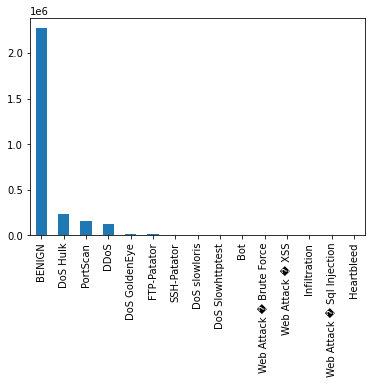

In [88]:
ax = df[' Label'].value_counts().plot(kind='bar')
# for i in range(len(labels)):
#     ax.text(i-0.2,100000, str(lb_count[i]), color='red', fontweight='bold')

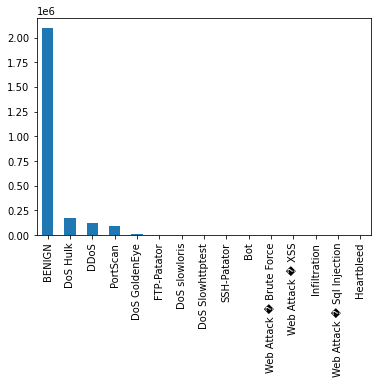

In [89]:
ax = df_nodup[' Label'].value_counts().plot(kind='bar')
# for i in range(len(labels)):
#     ax.text(i-0.2,100000, str(lb_count[i]), color='red', fontweight='bold')

In [10]:
print(labels)

['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'Infiltration' 'DDoS' 'Bot' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'PortScan'
 'FTP-Patator' 'SSH-Patator']


# Classification

## Binary (attack/benign)

In [5]:
import torch

In [24]:
def set_binary_label(df, label_col, default_class='BENIGN'):
    df_y = df[label_col].copy()
    rep_class = {}
    lab_names = df_y.unique()
    for lab in lab_names:
        if lab == default_class:
            rep_class[lab] = 0
        else:
            rep_class[lab] = 1
    df_y.replace(rep_class)
    return df_y

def set_multiple_label(df, label_col, label_dic):
    df_y = df[label_col].copy()
    lab_names = df_y.unique()
    drop_idx = pd.Index([])
    for lab in lab_names:
        if lab in label_dic.keys():
#             print('pass', lab)
            pass
        else:
            print('drop', lab)
            drop_idx = drop_idx.append(df[df[label_col]==lab].index)  
    print("original instances: ",len(df))
    print("drop intances: ", len(drop_idx))
    df = df.drop(drop_idx)
    print("after drop: ",len(df))
#     del df_y, drop_idx
    df.replace({label_col:label_dic},inplace = True)
    return df

In [14]:
df_y = set_binary_label(df,label_col=' Label', default_class='BENIGN')

In [10]:
lab_cluster = {0: ['Web Attack � Brute Force','Web Attack � XSS','Web Attack � Sql Injection'],
             1: ['DDoS'],
             2: ['Bot'],
             3: ['DoS slowloris','DoS Slowhttptest','DoS Hulk','DoS GoldenEye'],
             4: ['PortScan'],
             5: ['FTP-Patator'],
             6: ['SSH-Patator']    
}
lab_dic = {}
for nlab in lab_cluster:
    for lab in lab_cluster[nlab]:
        lab_dic[lab] = nlab
print(lab_dic)

{'Web Attack � Brute Force': 0, 'Web Attack � XSS': 0, 'Web Attack � Sql Injection': 0, 'DDoS': 1, 'Bot': 2, 'DoS slowloris': 3, 'DoS Slowhttptest': 3, 'DoS Hulk': 3, 'DoS GoldenEye': 3, 'PortScan': 4, 'FTP-Patator': 5, 'SSH-Patator': 6}


In [25]:
df_mul = set_multiple_label(df_nodup,label_col=' Label', label_dic = lab_dic)

drop BENIGN
drop Infiltration
drop Heartbleed
original instances:  2830731
drop intances:  2273132
after drop:  557599


In [26]:
df_mul.head()

,index,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
12637,12637,80,5185118,7,7,1022,2321,372,0,146.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
12643,12643,80,5057374,10,7,736,9880,395,0,73.600000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
12700,12700,80,81,1,1,0,0,0,0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
12712,12712,80,5271123,7,5,969,1430,561,0,138.428571,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
12791,12791,80,5020638,7,4,973,1430,565,0,139.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0


<AxesSubplot:>

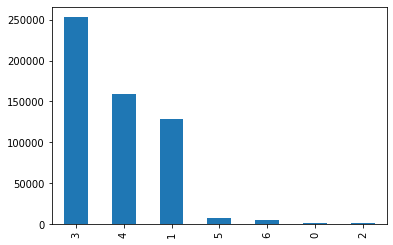

In [27]:
df_mul[' Label'].value_counts().plot(kind='bar')

In [ ]:
class CICDataset(Dataset):
    def __init__(self, df_x,df_y,select_idx=None):        
        if select_idx is None:
            self.x_tensor = torch.tensor(df_x.values,dtype=torch.float32)
            self.y_tensor = torch.tensor(df_y.values,dtype=torch.float32)
        else:
            self.x_tensor = torch.tensor(df_x[select_idx].values,dtype=torch.float32)
            self.y_tensor = torch.tensor(df_y[select_idx].values,dtype=torch.float32)
    def __len__(self):
        return len(self.y_tensor)
    def __getitem__(self,idx):
        return self.x_tensor[idx],self.y_tensor[idx]